In [81]:
import pandas as pd
import numpy as np
import os
import shutil
import statistics
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.backends.backend_pdf import PdfPages
import movieslib as mov
import seaborn as sns
import copy

#import importlib
#importlib.reload(movieslib)

In [76]:
FOLDER_INPUT = './12movies_cuts/'
FOLDER_OUTPUT = './statistics_universal_formula'
NORMALISE = False
FILTERING = False #(it takes very long)
VALUE = 'avg' #(sum/max of AUs)

df = pd.read_csv("./12movies_cuts/ClickHM.csv", delimiter=',')
start = 0
df[start:start+10]

,Unnamed: 0,frame,face_id,timestamp,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0,3577,0.0,149.149,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.58,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,1,3578,0.0,149.191,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.82,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,2,3579,0.0,149.233,0.20,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.52,0.0,0.0,0.10,0.0,0.0,0.0,0.0
3,3,3580,0.0,149.274,0.41,0.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.48,0.0,0.0,0.30,0.0,0.0,0.0,0.0
4,4,3581,0.0,149.316,0.43,0.15,0.0,0.0,0.0,0.0,...,0.0,0.0,0.38,0.0,0.0,0.32,0.0,0.0,0.0,0.0
5,5,3582,0.0,149.358,0.41,0.04,0.0,0.0,0.0,0.0,...,0.0,0.0,0.24,0.0,0.0,0.45,0.0,0.0,0.0,0.0
6,6,3583,0.0,149.399,0.49,0.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.33,0.0,0.0,0.24,0.0,0.0,0.0,0.0
7,7,3584,0.0,149.441,0.47,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.60,0.0,0.0,0.19,0.0,0.0,0.0,0.0
8,8,3585,0.0,149.483,0.53,0.06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.44,0.0,0.0,0.25,0.0,0.0,0.0,0.0
9,9,3586,0.0,149.525,0.53,0.09,0.0,0.0,0.0,0.0,...,0.0,0.0,0.54,0.0,0.0,0.04,0.0,0.0,0.0,0.0


In [82]:
cols = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r']

# Define the formula as a function
def calculate_sum(row):

    sum_au = 0
    for au in cols:
        sum_au += math.exp(row[au]/5) - 1
    
    sigma = 1/(len(cols) * math.exp(1) - 1) * sum_au
    return sigma #sum for rows

# Apply the formula to each row using the apply function
df['exp_sum'] = df.apply(calculate_sum, axis=1)
df['sum'] = (df[cols].sum(axis=1))/len(cols)


temp = df.iloc[100]
sum_au = 0
for au in cols:
    sum_au += math.exp(temp[au]/5) - 1

#print(sum_au)

df

,Unnamed: 0,frame,face_id,timestamp,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,exp_sum,sum
0,0,3577,0.0,149.149,0.00,0.00,0.00,0.00,0.00,0.00,...,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.003092,0.038667
1,1,3578,0.0,149.191,0.00,0.00,0.00,0.00,0.00,0.00,...,0.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.004481,0.054667
2,2,3579,0.0,149.233,0.20,0.00,0.00,0.00,0.00,0.00,...,0.52,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.004290,0.054667
3,3,3580,0.0,149.274,0.41,0.10,0.00,0.00,0.00,0.00,...,0.48,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.006744,0.086000
4,4,3581,0.0,149.316,0.43,0.15,0.00,0.00,0.00,0.00,...,0.38,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.006671,0.085333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37800,37800,144936,323.0,6045.003,1.29,0.00,0.61,0.00,2.59,3.15,...,4.15,1.30,0.63,1.25,0.45,1.47,0.97,1.17,0.157986,1.565333
37801,37801,144937,323.0,6045.045,1.07,0.00,0.48,0.00,2.84,3.69,...,4.21,1.24,1.34,1.10,0.57,1.18,1.21,1.25,0.167653,1.642667
37802,37802,144938,323.0,6045.087,1.55,0.00,0.40,0.00,2.54,3.38,...,3.93,1.30,1.66,1.56,0.42,1.46,1.17,1.15,0.161985,1.625333
37803,37803,144939,323.0,6045.128,1.97,0.08,1.21,0.00,1.98,2.45,...,2.82,0.95,1.08,1.02,0.13,1.89,1.14,0.99,0.129710,1.388667


        exp_sum       sum
0      0.003092  0.038667
1      0.004481  0.054667
2      0.004290  0.054667
3      0.006744  0.086000
4      0.006671  0.085333
...         ...       ...
37800  0.157986  1.565333
37801  0.167653  1.642667
37802  0.161985  1.625333
37803  0.129710  1.388667
37804  0.105660  1.187333

[37805 rows x 2 columns]


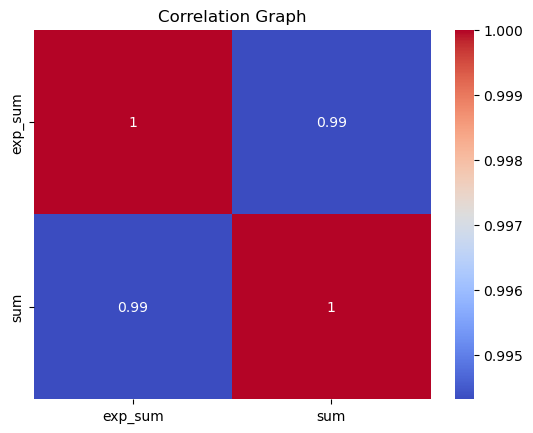

In [83]:
df_ = df[['exp_sum', 'sum']]
print(df_)
correlation_matrix = df_.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Graph')

# Display the plot
plt.show()

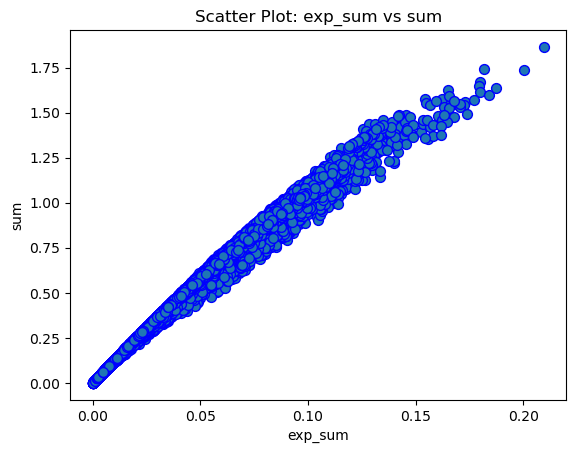

In [45]:
# Plot Variable1 and Variable2 as dots
#plt.scatter(df['exp_sum'], df['sum'])
plt.scatter(df['exp_sum'], df['sum'], s=50, edgecolors='blue')
#plt.plot(df['exp_sum'], color='red', markersize=0.01)
#plt.show()
#plt.plot(df['sum'], color='blue', markersize=0.5)

# Set the axis labels
plt.xlabel('exp_sum')
plt.ylabel('sum')

# Set the plot title
plt.title('Scatter Plot: exp_sum vs sum')

# Display the plot
plt.show()

In [87]:
df_filtered = copy.deepcopy(df)
df_filtered = mov.sg_filter(df_filtered)

In [88]:
shots = list(df.face_id.unique())
#print(shots)

In [60]:
ids = np.random.randint(0, len(df.face_id.unique()), size=6)
for i in ids:
    print(i)

82
2
264
244
219
86


In [101]:
ids = np.random.randint(0, len(df.face_id.unique()) - 1, size=6)
ids

array([189, 222, 186, 153, 193, 119])

In [ ]:
#plot graphs of all AUs in all files and save in a pdf format (one figure == all AUs of one file)
pdf = PdfPages("AU_filtering_experiments.pdf") #filename

id = 0
deg = 3

for au in cols:

    ids = np.random.randint(0, len(df.face_id.unique()) - 1, size=6)
    for id in ids:

        # set figure
        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
        fig.suptitle(str(au) + 'face_id = ' + str(id)) #figure title

        count = 0
        au_i = list(df[df['face_id'] == id][au])
        length = len(au_i)
        print(length)
        coeff = [length//24 + 3, length//16 + 3, length//8 + 3, length//4 + 3, length//2 + 3]

        for i in range(2):
            for j in range(3):
                if i + j > 3:
                    continue

            #df = data[names[count]] #get a dataset; names[count] is a name of a movie

            #au_i = df[au]
                window = 'original'

                if count != 0:
                    window = coeff[count - 1] + deg
                    #print(length, window, deg)
                    if deg > window:
                        window = 5
                    au_i = savgol_filter(au_i, window, deg)
            
                ax[i, j].plot(au_i, color='red', alpha=0.5)
                ax[i, j].set_title('window_size=' + str(window))

                count += 1


        plt.tight_layout()
        plt.show()

        #save plot
        pdf.savefig(fig)

pdf.close()

In [ ]:
#Sequence of the actions
# 
# 0. upload datasets
# 1. Separate 'keira knightley' shoots 
#2. Filter the data (AU_r columns)
#3. Calculate stats: -for each line; for each frame
# Output:  a dataframe with mean values of extracted features for each frame in each video
            #-the dataframes of all videos with extracted features for each line
            #a dataframe with average for the whole video (later)

In [4]:
filenames = mov.get_filenames(FOLDER_INPUT, file='M')
filenames

['MonsterInLawHM.csv',
 'QuantumOfSolaceHM.csv',
 'CleanAM.csv',
 'SynecdocheAM.csv',
 'BrightStarAM.csv',
 'ClickHM.csv',
 'CertifiedCopyAM.csv',
 'SpiderAM.csv',
 'AllOrNothingAM.csv',
 'PiratesOfCaribbeanHM.csv',
 'TheDarkKnightHM.csv',
 'FastAndFuriousHM.csv']

In [146]:
#upload statistics

OUTPUT = './universal_formula/' #create a new folder (rewrite!)

#REWRITE the folder
mov.new_folder(OUTPUT)

output = pd.DataFrame(columns=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD'])

head = True

for i in filenames:
    name = i.split('.')[0][:-2]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')

    #normalize data
    if NORMALISE:
        df = mov.normalize(df)
    
    #apply savgol algorithm
    if FILTERING:
        df = mov.sg_filter(df) #filter AUs

    stat = mov.stat(df, name, value=VALUE)

    #save all files separately
    #pd.DataFrame.from_dict(stat).to_csv(f'./{OUTPUT}/{name}.csv', sep=',', header=True, mode='w') #write logs for each file

    pd.DataFrame.from_dict(stat).to_csv(f'./{OUTPUT}/All_movies.csv', sep=',', header=head, mode='a') #write all logs in one file

    if head:
        head = False

Prosess file MonsterInLaw ...
ok reading csv...
Prosess file QuantumOfSolace ...
ok reading csv...
Prosess file Clean ...
ok reading csv...
Prosess file Synecdoche ...
ok reading csv...
Prosess file BrightStar ...
ok reading csv...
Prosess file Click ...
ok reading csv...
Prosess file CertifiedCopy ...
ok reading csv...
Prosess file Spider ...
ok reading csv...
Prosess file AllOrNothing ...
ok reading csv...
Prosess file PiratesOfCaribbean ...
ok reading csv...
Prosess file TheDarkKnight ...
ok reading csv...
Prosess file FastAndFurious ...
ok reading csv...


In [101]:
df = pd.read_csv(f'./{OUTPUT}/All_movies.csv', sep=',')

In [102]:
HM = ['MonsterInLaw', 'QuantumOfSolace', 'Click', 'PiratesOfCaribbean', 'TheDarkKnight', 'FastAndFurious']
AM = ['Clean', 'Synecdoche', 'BrightStar', 'CertifiedCopy', 'Spider', 'AllOrNothing']

In [103]:
outputHM = pd.DataFrame(columns=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD'])

for i in HM:
    outputHM = pd.concat([outputHM, df[df['movie'] == i]]) #select rows with a particular face_id

In [104]:
outputAM = pd.DataFrame(columns=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD'])

for i in AM:
    outputAM = pd.concat([outputAM, df[df['movie'] == i]]) #select rows with a particular face_id

In [105]:
list(outputAM.movie.unique())

['Clean',
 'Synecdoche',
 'BrightStar',
 'CertifiedCopy',
 'Spider',
 'AllOrNothing']

In [106]:
hm = outputHM.mean()
am = outputAM.mean()

print(hm)
print(am)

face_id           139.216729
time                4.779409
eyes_mean           0.527802
eyes_SD             0.153008
midpart_mean        0.484097
midpart_SD          0.151481
mouth_mean          0.599533
mouth_SD            0.128842
eyes_d_mean         0.000046
eyes_d_SD           0.040577
midpart_d_mean      0.000044
midpart_d_SD        0.042352
mouth_d_mean        0.000060
mouth_d_SD          0.038018
Unnamed: 0        142.206468
dtype: float64
face_id           180.763436
time                7.075396
eyes_mean           0.502865
eyes_SD             0.149753
midpart_mean        0.480570
midpart_SD          0.147273
mouth_mean          0.591080
mouth_SD            0.124570
eyes_d_mean         0.000042
eyes_d_SD           0.034889
midpart_d_mean      0.000078
midpart_d_SD        0.036061
mouth_d_mean        0.000051
mouth_d_SD          0.032207
Unnamed: 0        193.135300
dtype: float64


/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_63617/1564161163.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = outputHM.mean()
/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_63617/1564161163.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  am = outputAM.mean()


In [107]:
output = pd.DataFrame(columns=['movie', 'face_id', 'time', 'eyes_mean', 'eyes_SD', 'midpart_mean', 'midpart_SD',
    'mouth_mean', 'mouth_SD', 'eyes_d_mean', 'eyes_d_SD', 'midpart_d_mean', 'midpart_d_SD', 'mouth_d_mean', 'mouth_d_SD'])

In [108]:
output = output.append(list([hm, am]))
#output.append(list([am]))

/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_63617/1369639925.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(list([hm, am]))


In [109]:
len(output)

2

In [110]:
output.loc[output['time'] == 4.779409]['movie'] = 'Hollywood'
output.loc[output['time'] == 7.075396]['movie'] = 'Art'

In [111]:
output

,movie,face_id,time,eyes_mean,eyes_SD,midpart_mean,midpart_SD,mouth_mean,mouth_SD,eyes_d_mean,eyes_d_SD,midpart_d_mean,midpart_d_SD,mouth_d_mean,mouth_d_SD,Unnamed: 0
0,NaN,139.216729,4.779409,0.527802,0.153008,0.484097,0.151481,0.599533,0.128842,0.000046,0.040577,0.000044,0.042352,0.000060,0.038018,142.206468
1,NaN,180.763436,7.075396,0.502865,0.149753,0.480570,0.147273,0.591080,0.124570,0.000042,0.034889,0.000078,0.036061,0.000051,0.032207,193.135300


In [112]:
pd.DataFrame.from_dict(output).to_csv(f'./{OUTPUT}/summary_stat_sum_sg.csv', sep=',', header=True, mode='w') #write all logs in one file

In [244]:
ds = df[df['face_id'] == 5]

In [160]:
shots = df.face_id.unique() #find unique face_ids
# for id in shots:
#   shot = df[df['face_id'] == id]

In [161]:
shot = df[df['face_id'] == 0]

<Axes: >

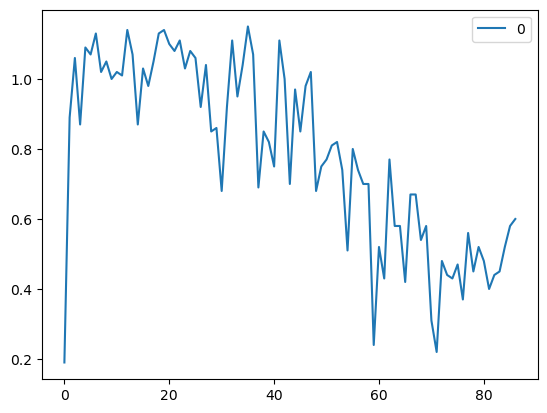

In [293]:
au = list(df[df['face_id'] == 5]['AU01_r'])
pd.DataFrame(au).plot()

In [316]:
au = list(df[df['face_id'] == 9]['AU01_r'])

def smooth_au(au, frac=2, deg=3):
    t = len(au)
    w = deg + 2

    SD = statistics.stdev(au)
    stdev = SD/math.sqrt(frac)
    #stdev = SD/2


    while w < t:
        smoothed = savgol_filter(au, w, deg)
    #plt.plot(au, color='b', label='AU')
    #plt.plot(smoothed, color='r', label='smoothed')
    #plt.show()

        sum = 0
        for i in range(t):
            sum += abs(au[i] - smoothed[i])

    #if sum/t > right:
        #print(w, sum/t, stdev)

        if sum/t > stdev:
            break

        w += 2

    plt.plot(au, color='b', label='AU')
    plt.plot(smoothed, color='r', label='smoothed')
    plt.show()

    print('orig_mean:', statistics.mean(au), 'smooth_mean:', statistics.mean(smoothed))


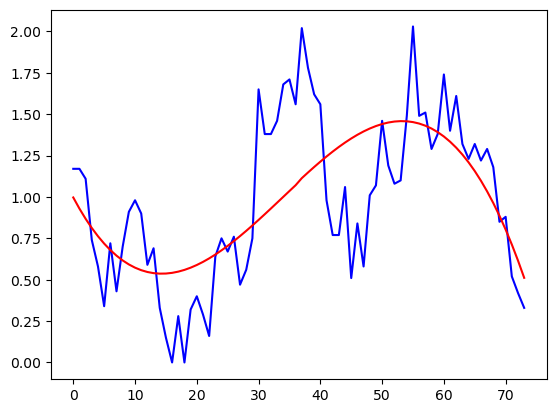

orig_mean: 0.9767567567567568 smooth_mean: 0.9767814815587356


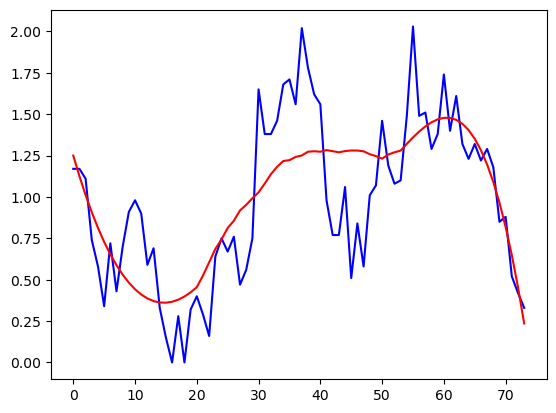

orig_mean: 0.9767567567567568 smooth_mean: 0.9856846526486626


In [317]:
au = list(df[df['face_id'] == 24]['AU01_r'])
smooth_au(au, 2)
smooth_au(au, 4)

Best window size: 71


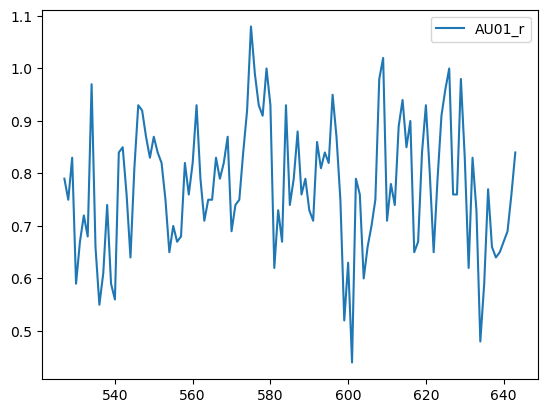

In [52]:
au = df[df['face_id'] == 4]['AU01_r']
pd.DataFrame(au).plot()

wsize = 5
results = []
while wsize < len(au):
    smoothed = savgol_filter(au, wsize, 2)
    signal = np.mean(au ** 2)
    noise = np.mean((au - smoothed) ** 2)
    snr = 10 * np.log10(signal / noise)
    results.append((wsize, snr))

    wsize += 6


best_window_size = min(results, key=lambda x: x[1])[0]
print(f"Best window size: {best_window_size}")



<Axes: >

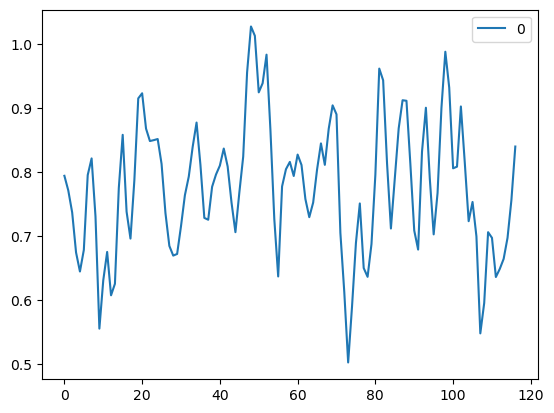

In [60]:
smoothed = savgol_filter(au, 5, 2)
pd.DataFrame(smoothed).plot()

<Axes: >

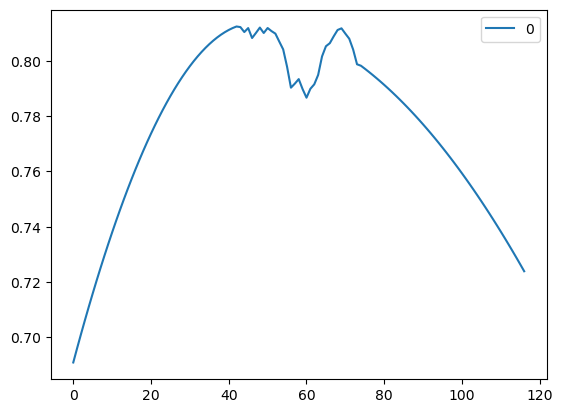

In [58]:
smoothed = savgol_filter(au, (3 * len(au)) // 4 - 1, 2)
pd.DataFrame(smoothed).plot()

<Axes: >

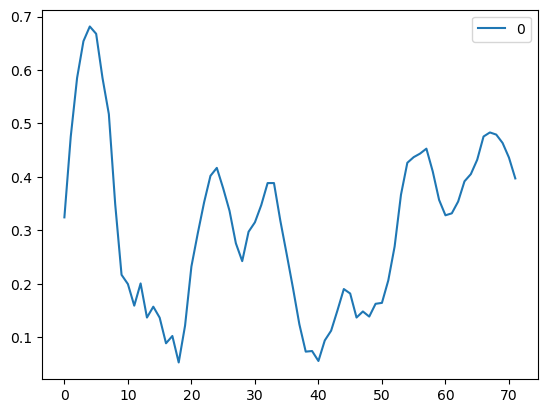

In [38]:
smoothed = savgol_filter(au, 11, 2)
pd.DataFrame(smoothed).plot()

<Axes: >

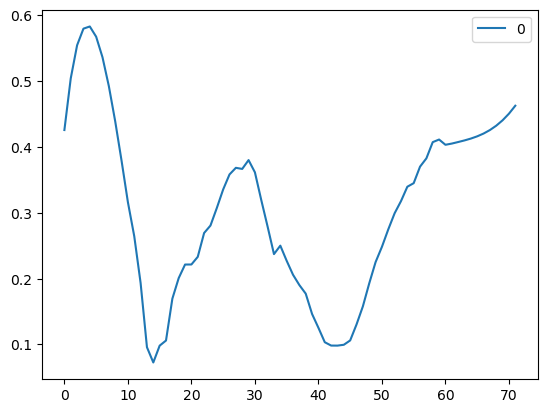

In [13]:
smoothed = savgol_filter(au, 21, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

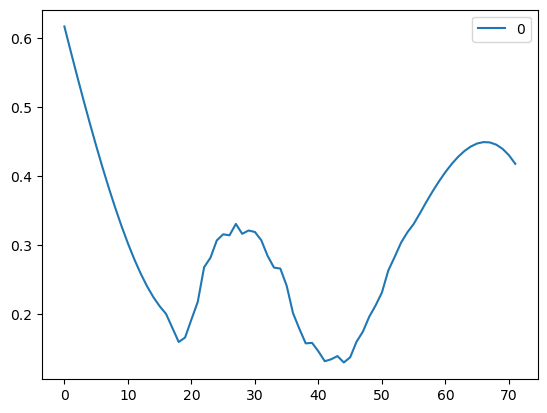

In [14]:
smoothed = savgol_filter(au, 31, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

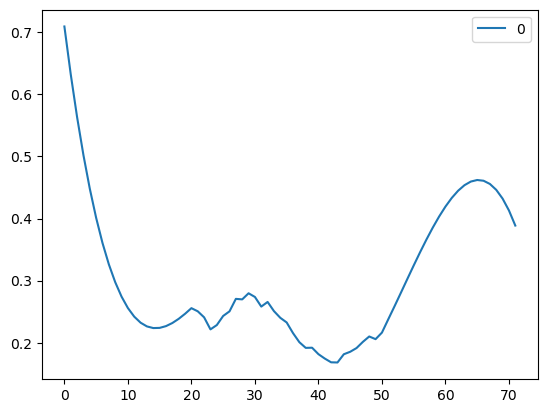

In [15]:
smoothed = savgol_filter(au, 41, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

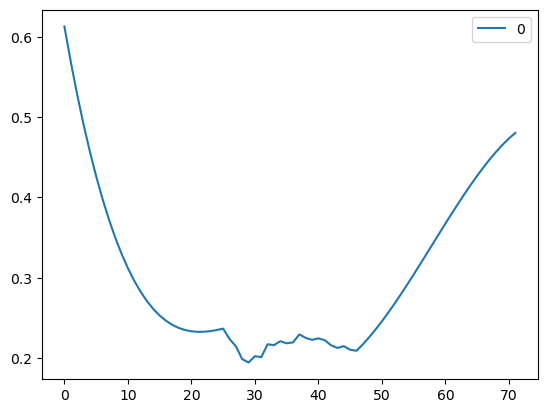

In [16]:
smoothed = savgol_filter(au, 51, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

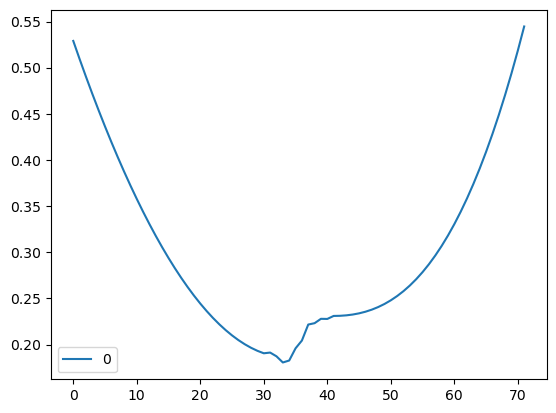

In [18]:
smoothed = savgol_filter(au, 61, 3)
pd.DataFrame(smoothed).plot()

<Axes: >

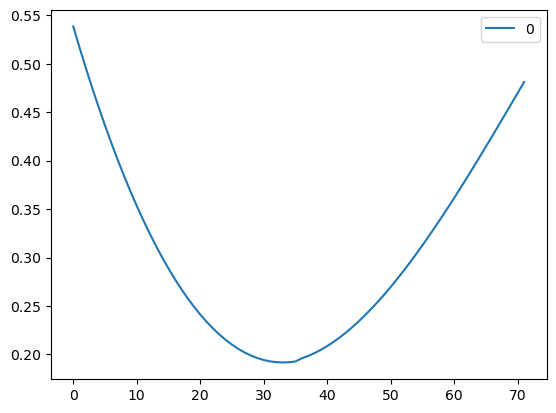

In [19]:
smoothed = savgol_filter(au, 71, 3)
pd.DataFrame(smoothed).plot()

In [341]:
#get statistical info of frames: calculating SUM of AU fields
def frames_info(df, name):
    i = 0
    temp = df.iloc[i]
    id_init = temp['face_id']
    id = 0
    frameN = 0
    frames_info = []
    while i < len(df)-1:
        id_init = id
        frame_len = 0
        frame_sum = 0
        
        #if temp['timestamp'] < 20:
            #continue
        while id == id_init and i < len(df)-1:
            frame_len += 1
            s = line_sum(temp, cols_of_interest)
            frame_sum += s
            #print(id, s)
            #get a new line
            i += 1
            temp = df.iloc[i]
            id = temp['face_id']
        #print('FRAME', frameN, 'SUM:', frame_len, frame_sum, frame_len*0.0415, frame_sum, frame_sum/frame_len)
        frames_info.append([frameN, frame_len, frame_sum, frame_len*0.0415, frame_sum/frame_len])
        frameN += 1
    
    if 'Quantum' in name:
        frames_info.pop(0)
        
    frames = pd.DataFrame(np.array(frames_info), columns=['face_id', 'frames_in_shot', 'AU_sum', 'frame_duration', 'AU_average'])
    print('ok')
    
    return frames

In [342]:
#calculate average by sum of AUs for each frame for each file

overall = []
movies = []
for i in filenames:
    name = i.split('_')[2].split('.')[0]
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')
    frames = frames_info(df, name)
    print('ok calculating frames...')
    AU_mean = frames["AU_average"].mean()
    overall_time = frames['frame_duration'].sum()
    print(len(frames), overall_time, AU_mean)
    movies.append(frames)
    overall.append([name, len(frames), overall_time, AU_mean])


Prosess file SpiderAM ...
ok reading csv...
ok
ok calculating frames...
211 1217.7759999999998 6.566204155218703
Prosess file CleanAM ...
ok reading csv...
ok
ok calculating frames...
251 1662.5315 6.8301508399715045
Prosess file ClickHM ...
ok reading csv...
ok
ok calculating frames...
324 1568.866 7.165949823267254
Prosess file AllOrNothingAM ...
ok reading csv...
ok
ok calculating frames...
443 3851.9055 7.307668514002374
Prosess file CertifiedCopyAM ...
ok reading csv...
ok
ok calculating frames...
365 4380.823 6.689813140121054
Prosess file FastAndFuriousHM ...
ok reading csv...
ok
ok calculating frames...
183 813.6075000000001 6.5970200365420615
Prosess file BrightStarAM ...
ok reading csv...
ok
ok calculating frames...
266 1727.1885000000002 7.261528816079377
Prosess file SynecdocheAM ...
ok reading csv...
ok
ok calculating frames...
448 2807.4335 7.49023412725654
Prosess file MonsterInLawHM ...
ok reading csv...
ok
ok calculating frames...
280 1472.337 6.997067083419031
Prosess

In [343]:
#save all files separately
for i in range(len(filenames)):
    name = filenames[i].split('_')[2].split('.')[0]
    pd.DataFrame.from_dict(movies[i]).to_csv(f'./simple_stat_AU_c/{name}_AU_r.csv', sep=',', mode='w')
    

In [344]:
#add labels for each movie: HM for hollywood, AM for artistic
AM = 0
HM = 0
for i in overall:
    print(i)
    if 'HM' in i[0]:
        HM += i[-1]
    else:
        AM += i[-1]

print(AM, HM)

['SpiderAM', 211, 1217.7759999999998, 6.566204155218703]
['CleanAM', 251, 1662.5315, 6.8301508399715045]
['ClickHM', 324, 1568.866, 7.165949823267254]
['AllOrNothingAM', 443, 3851.9055, 7.307668514002374]
['CertifiedCopyAM', 365, 4380.823, 6.689813140121054]
['FastAndFuriousHM', 183, 813.6075000000001, 6.5970200365420615]
['BrightStarAM', 266, 1727.1885000000002, 7.261528816079377]
['SynecdocheAM', 448, 2807.4335, 7.49023412725654]
['MonsterInLawHM', 280, 1472.337, 6.997067083419031]
['PiratesOfCaribbeanHM', 286, 1532.595, 7.414194532136996]
['TheDarkKnightHM', 338, 1674.691, 7.51179997450836]
['QuantumOfSolaceHM', 163, 702.6780000000001, 6.3583310138712985]
42.14559959264955 42.044362463745


In [345]:
#save averall statistical info
movies_output = pd.DataFrame(np.array(overall), columns=['movie', 'suitable_shoots', 'time', 'AU_average'])
pd.DataFrame.from_dict(movies_output).to_csv(f'./simple_stat_AU_c/AU_c_mean.csv', sep=',', mode='w')

In [ ]:
################################
#######save data in a different format

In [441]:
def coun_frames(df, cols, name):
    print('Data frame length:', len(df))
    shots_len = []
    shots = []
    i = int(df.iloc[0]['face_id']) #first id
    print(i)
    last_id = df.iloc[len(df)-1]['face_id']
    print(last_id)
    fname = name[:-2]

    while i <= int(last_id):
        shots_len.append(len(df[df["face_id"] == i]))
        #print(shots_len[i])
        shot = list(range(1, shots_len[i]+1)) #array from 1 to shots_len[i]
        shots += shot
        i += 1
    #print(shot)


    #print(shots)
    df['success'] = shots
    df['frame'] = fname
    #df = df.rename(columns={"success": "frame"})
    df = df[['frame', 'face_id', 'success'] + cols]
    df = df.rename(columns={"frame": "title"})

    if 'Quantum' in name:
        df = df[df["face_id"] != 0]

    return df


In [435]:
#calculate mean by every AU column for each file

FOLD = './12movies_shots' #create a new folder (rewrite!)
new_folder(FOLD)

header = True

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    fnames_short.append(name)
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')


    temp_dset = coun_frames(df, cols_of_interest, name)
    temp_dset = temp_dset.rename(columns={"face_id": "shot", "success": "frame"})

    pd.DataFrame.from_dict(temp_dset).to_csv(f'./{FOLD}/{name}.csv', sep=',', header, mode='w')

    if header:
        header = False

Prosess file SpiderAM ...
ok reading csv...
Data frame length: 29345
0
210.0
Prosess file CleanAM ...
ok reading csv...
Data frame length: 40062
0
250.0
Prosess file ClickHM ...
ok reading csv...
Data frame length: 37805
0
323.0
Prosess file AllOrNothingAM ...
ok reading csv...
Data frame length: 92818
0
442.0
Prosess file CertifiedCopyAM ...
ok reading csv...
Data frame length: 105563
0
364.0
Prosess file FastAndFuriousHM ...
ok reading csv...
Data frame length: 19606
0
182.0
Prosess file BrightStarAM ...
ok reading csv...
Data frame length: 41620
0
265.0
Prosess file SynecdocheAM ...
ok reading csv...
Data frame length: 67650
0
447.0
Prosess file MonsterInLawHM ...
ok reading csv...
Data frame length: 35479
0
279.0
Prosess file PiratesOfCaribbeanHM ...
ok reading csv...
Data frame length: 36931
0
285.0
Prosess file TheDarkKnightHM ...
ok reading csv...
Data frame length: 40355
0
337.0
Prosess file QuantumOfSolaceHM ...
ok reading csv...
Data frame length: 17136
0
163.0


In [444]:
#calculate mean by every AU column for each file

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    fnames_short.append(name)
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')


    temp_dset = coun_frames(df, cols_of_interest, name)
    temp_dset = temp_dset.rename(columns={"face_id": "shot", "success": "frame"})
    
    pd.DataFrame.from_dict(temp_dset).to_csv(f'./{FOLD}/12movies_shots.csv', sep=',', mode='a', index=False)

Prosess file SpiderAM ...
ok reading csv...
Data frame length: 29345
0
210.0
Prosess file CleanAM ...
ok reading csv...
Data frame length: 40062
0
250.0
Prosess file ClickHM ...
ok reading csv...
Data frame length: 37805
0
323.0
Prosess file AllOrNothingAM ...
ok reading csv...
Data frame length: 92818
0
442.0
Prosess file CertifiedCopyAM ...
ok reading csv...
Data frame length: 105563
0
364.0
Prosess file FastAndFuriousHM ...
ok reading csv...
Data frame length: 19606
0
182.0
Prosess file BrightStarAM ...
ok reading csv...
Data frame length: 41620
0
265.0
Prosess file SynecdocheAM ...
ok reading csv...
Data frame length: 67650
0
447.0
Prosess file MonsterInLawHM ...
ok reading csv...
Data frame length: 35479
0
279.0
Prosess file PiratesOfCaribbeanHM ...
ok reading csv...
Data frame length: 36931
0
285.0
Prosess file TheDarkKnightHM ...
ok reading csv...
Data frame length: 40355
0
337.0
Prosess file QuantumOfSolaceHM ...
ok reading csv...
Data frame length: 17136
0
163.0


In [308]:
#calculate mean by every AU column
def mean_by_cols(df, name):
    last_frame = df.iloc[len(df)-1]['face_id']
    count = 0
    AU_mean = []

    for i in cols_of_interest:
        temp = list(df.groupby('face_id')[i].mean())
        AU_mean.append(temp)
    AU_mean = np.array(AU_mean).transpose()

    id = []
    for i in range(int(last_frame)+1):
        id.append(i)

    au_cols = ['face_id'] + cols_of_interest
    au = pd.DataFrame(np.array(AU_mean), columns=cols_of_interest)
    au['face_id'] = id

    if 'Quantum' in name:
        au = au.drop(au[au.face_id == 0].index)

    return au




In [315]:
#calculate mean by every AU column for each file

FOLD = './stat_AU_fields' #create a new folder (rewrite!)
new_folder(FOLD)
mean_AU_general = []
fnames_short = []

for i in filenames:
    name = i.split('_')[2].split('.')[0]
    fnames_short.append(name)
    print('Prosess file', name, '...')
    df = pd.read_csv(FOLDER_INPUT + i, delimiter=',')
    print('ok reading csv...')
    au = mean_by_cols(df, name)

    temp = list(au[cols_of_interest].mean())
    temp.insert(0, name[-2:]) #add index: HM or AM
    temp.insert(0, name) #add a movie name
    mean_AU_general.append(temp)
    pd.DataFrame.from_dict(au).to_csv(f'./{FOLD}/{name}_AU_stat.csv', sep=',', mode='w')

    
    


Prosess file SpiderAM ...
ok reading csv...
Prosess file CleanAM ...
ok reading csv...
Prosess file ClickHM ...
ok reading csv...
Prosess file AllOrNothingAM ...
ok reading csv...
Prosess file CertifiedCopyAM ...
ok reading csv...
Prosess file FastAndFuriousHM ...
ok reading csv...
Prosess file BrightStarAM ...
ok reading csv...
Prosess file SynecdocheAM ...
ok reading csv...
Prosess file MonsterInLawHM ...
ok reading csv...
Prosess file PiratesOfCaribbeanHM ...
ok reading csv...
Prosess file TheDarkKnightHM ...
ok reading csv...
Prosess file QuantumOfSolaceHM ...
ok reading csv...


In [320]:
#calculate average for categories: HM and AM
au_mean = pd.DataFrame(np.array(mean_AU_general), columns=['movie', 'category']+cols_of_interest)

dataH = au_mean.loc[au_mean['category'] == 'HM'][cols_of_interest]
dataA = au_mean.loc[au_mean['category'] == 'AM'][cols_of_interest]
for i in cols_of_interest:
    dataH[i] = pd.to_numeric(dataH[i])
    dataA[i] = pd.to_numeric(dataA[i])
#print(dataH)
HM_mean = dataH[cols_of_interest].mean()
HM_mean['movie'] = 'Average'
HM_mean['category'] = 'HM'
AM_mean = dataA[cols_of_interest].mean()
AM_mean['category'] = 'AM'
AM_mean['movie'] = 'Average'

#append new lines: HM average and AM average
au_mean = au_mean.append(HM_mean, ignore_index=True)
au_mean = au_mean.append(AM_mean, ignore_index=True)

pd.DataFrame.from_dict(au_mean).to_csv(f'./{FOLD}/OVERALL_AU_stat_overall.csv', sep=',', mode='w')


/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_7165/4205811853.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  au_mean = au_mean.append(HM_mean, ignore_index=True)
/var/folders/63/bs2t6x0j25s1wrgwd4kwyzzr0000gn/T/ipykernel_7165/4205811853.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  au_mean = au_mean.append(AM_mean, ignore_index=True)


In [321]:
au_mean

,movie,category,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,SpiderAM,AM,0.9493918438115928,0.3392046463944249,0.7388964895898026,0.6879994953243664,0.19488165389911563,0.3899918995156678,0.18479917396514484,0.7370492073577362,...,0.0994932250917507,0.39919724950081875,0.7163119292814921,0.32105057413033167,0.4286303439469457,0.15256050129896614,0.2441285376832852,0.28868719781483676,0.5824729052950394,0.2733872413299323
1,CleanAM,AM,0.9249637133050316,0.6303074522861439,0.5120793474201755,0.48061242474589105,0.28495490051139577,0.6185838451638274,0.4948771894142668,0.8367943378422472,...,0.15826328709929738,0.3073426305568563,0.6561176342735608,0.2948753969661658,0.5222243378952232,0.1729625535521118,0.302583601784915,0.3804760993076762,0.3260760477271473,0.44611256102043395
2,ClickHM,HM,1.0972805301997581,0.47956329986684376,0.7697691774316937,0.8431713104058923,0.24787219255283682,0.427461672592562,0.15847417232124344,0.7279263447491475,...,0.16336454982050597,0.35234624421824345,0.7085675323662397,0.2580480364968927,0.3163740601543729,0.1488817386449634,0.5575655953794018,0.5321380962975145,0.3826573695078289,0.4341648779623711
3,AllOrNothingAM,AM,1.241422955360487,0.4642208691966093,1.1762435456116642,0.7650205230690091,0.26295563727444293,0.4045492332346032,0.268216113024298,0.8559049380966958,...,0.07911663090583654,0.3008703328818338,0.7854350496144855,0.3793638282189969,0.4250626657427175,0.23625041480052983,0.37975270028566616,0.471571374921525,0.634981524931425,0.3771348028265536
4,CertifiedCopyAM,AM,0.6995450767904435,0.37820544251330435,0.7869501054672193,0.4578452528565954,0.31135698697461067,0.40848096184577887,0.295543831988432,0.7454294589038073,...,0.32759063896556656,0.46851795894712733,0.5738119022251601,0.26511694379330897,0.45392147131138383,0.2016187839807111,0.306764189210253,0.3236524164159487,0.40002902208366103,0.34457563677236436
5,FastAndFuriousHM,HM,0.8959664996817975,0.32826899476673915,1.099579340841498,0.6640046880328101,0.20777284295357623,0.24232459852002117,0.18202941241035997,0.786010035000466,...,0.06856319962918742,0.3207564517599316,0.6464419133422334,0.43524357806974356,0.35635162814012017,0.2739923126032854,0.26661956850994767,0.38394235228067947,0.5999636914435116,0.4744898381477765
6,BrightStarAM,AM,0.6558165747601751,0.06930764231813191,0.7044878641344975,0.3323119494557026,0.31887888976724715,0.3341458491731859,0.2992398002844632,0.43739980066114054,...,0.32790535515362657,0.6977662498260851,0.5395622870135031,0.4244403632616139,0.7457034656712759,0.22832045871627923,0.1730944777708274,0.13319893020410029,0.3186473289523891,0.308534454607931
7,SynecdocheAM,AM,0.6927534939739838,0.22983611565393217,1.0775610698227613,0.5705319132916263,0.6503424473195641,0.6519903856276764,0.5537315070180217,0.9475255982062587,...,0.2396803541772165,0.5090595281867802,0.7305906948431272,0.3606580439720812,0.49092840006491884,0.20912356909864593,0.3636220800707114,0.2797233402560955,0.4384922515785051,0.36615407908291503
8,MonsterInLawHM,HM,0.8997794875927605,0.5210315650783673,0.4030123763033676,0.6117773778083787,0.25002944763739293,0.31902055708752547,0.12207724333391184,0.7255047028886049,...,0.3051663720912375,0.4167035150398028,0.6094809530098684,0.23254460007540279,0.33386710289005683,0.10935270968485117,0.41593887608846525,0.4289052888677297,0.3442102336205472,0.41658765201035497
9,PiratesOfCaribbeanHM,HM,1.0437308554450235,0.3903182360980923,0.7115987834004266,0.7774772690912616,0.39131594655981916,0.4218735496471165,0.36625632169768885,0.7971260562629384,...,0.11248034391636581,0.2999539800763517,0.7366146593077147,0.4596925046080889,0.37875325781915964,0.27747570891261997,0.38336225527552814,0.4182949293053311,0.613333762222439,0.2830285833063852


In [660]:
au1 = df[df['face_id'] == 1]['AU01_r']
pd.DataFrame(au1[:100]).plot()

yhat = savgol_filter(au1, 23, 3)
pd.DataFrame(yhat).plot()


<AxesSubplot:>

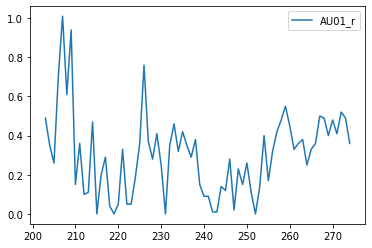

In [661]:
pd.DataFrame(au1).plot()

<AxesSubplot:>

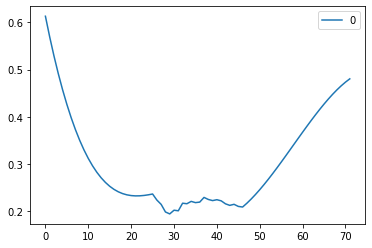

In [662]:
from scipy.signal import savgol_filter
yhat = savgol_filter(au1, 51, 3)
pd.DataFrame(yhat).plot()

In [663]:
print(yhat, au1)

[0.61276786 0.56897772 0.52858265 0.49145233 0.45745642 0.42646459
 0.39834648 0.37297177 0.35021012 0.32993119 0.31200465 0.29630015
 0.28268735 0.27103593 0.26121555 0.25309586 0.24654653 0.24143722
 0.23763759 0.23501731 0.23344604 0.23279344 0.23292918 0.23372291
 0.2350443  0.23676301 0.22395275 0.21482299 0.19877596 0.19465537
 0.20249541 0.20127364 0.21728737 0.21620626 0.22115088 0.21853972
 0.21967021 0.22956828 0.22523613 0.22283744 0.22469818 0.22234569
 0.21601305 0.21273528 0.21497565 0.21052164 0.20922241 0.21729138
 0.22615071 0.2357275  0.24594882 0.25674175 0.26803338 0.27975078
 0.29182104 0.30417124 0.31672846 0.32941978 0.34217229 0.35491307
 0.36756919 0.38006774 0.3923358  0.40430046 0.41588879 0.42702788
 0.4376448  0.44766665 0.45702049 0.46563342 0.47343251 0.48034485] 203    0.49
204    0.35
205    0.26
206    0.70
207    1.01
       ... 
270    0.48
271    0.41
272    0.52
273    0.49
274    0.36
Name: AU01_r, Length: 72, dtype: float64


<AxesSubplot:>

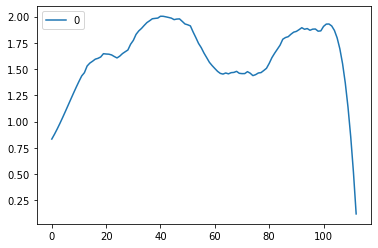

In [508]:
yhat = savgol_filter(au1, 23, 3)
pd.DataFrame(yhat).plot()

<AxesSubplot:>

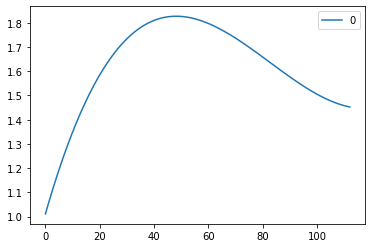

In [512]:
yhat = savgol_filter(au1, 113, 3)
pd.DataFrame(yhat).plot()

In [514]:
df['face_id'][29344]

210

In [515]:
au = []
for i in range(210):
    au.append(df[df['face_id'] == i]['AU01_r'])

In [521]:
'''for i in range(210):
    pd.DataFrame(au[i]).plot()
    yhat = savgol_filter(au[i], 53, 3)
    print('id = ', i)
    print(list(au[i][:50]))
    print(yhat[:50])
    pd.DataFrame(yhat).plot()'''

"for i in range(210):\n    pd.DataFrame(au[i]).plot()\n    yhat = savgol_filter(au[i], 53, 3)\n    print('id = ', i)\n    print(list(au[i][:50]))\n    print(yhat[:50])\n    pd.DataFrame(yhat).plot()"